In [1]:
import scipy
import matplotlib
import pandas
import sklearn
import numpy

In [2]:
import pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from pandas import read_csv
import os









In [9]:
url="https://raw.githubusercontent.com/jbrownlee/datasets/master/iris.csv"
names = ["sepal-lenght","sepal_width","petal-length","petal_width","class"]
dataset = read_csv(url, names=names)


In [10]:
print(dataset.shape)

(150, 5)


In [23]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
print(dataset.head())

   sepal-lenght  sepal_width  petal-length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [12]:
print(dataset.describe())

       sepal-lenght  sepal_width  petal-length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
print(dataset.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


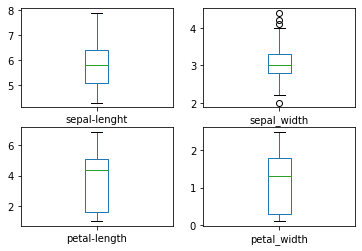

In [14]:
dataset.plot(kind="box",subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

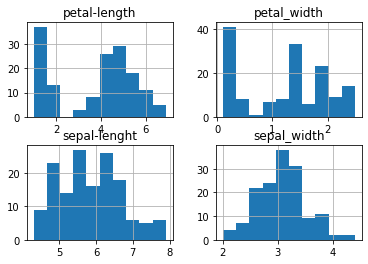

In [15]:
dataset.hist()
pyplot.show()

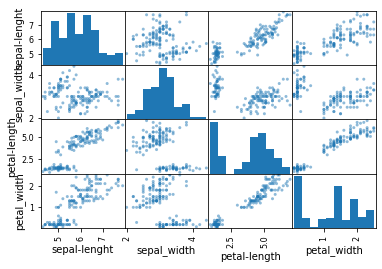

In [16]:
scatter_matrix(dataset)
pyplot.show()

In [17]:
array =dataset.values
x=array[:,0:4]
y=array[: , 4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =1)

In [18]:
#Logistic Regression
#Linear Discriminant Analysis
#KNeighbours
#Classification and Regression Tree
#Gaussian Naive Bayes
#Support Vector Machines

#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [19]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  result = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(result)

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


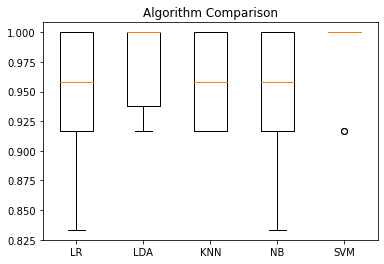

In [20]:
#compare our models
pyplot.boxplot(results,labels=names)
pyplot.title("Algorithm Comparison")
pyplot.show()

In [21]:
#make predictions on svm
model = SVC(gamma="auto")
model.fit(x_train,y_train)
predictions =model.predict(x_test)

In [22]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

